### Diffrences between self ratings and date ratings 

In [1]:
from pprint import pprint

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
raw = pd.read_csv("data/Speed-Dating-Data.csv", encoding="windows-1252")

In [3]:
dropping = ["idg", "condtn", "position", "positin1", "field", "undergra", "mn_sat", "tuition", "from", "zipcode", "career",
           "exphappy", "attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]

data = raw.drop(columns=dropping)

In [4]:
self_ratings = ["attr3_1", "sinc3_1", "intel3_1", "fun3_1", "amb3_1"]

In [18]:
real = dict()

for index, row in data.iterrows():
    iid = int(row["iid"])

    x = row[["attr_o", "sinc_o", "intel_o", "fun_o", "amb_o"]].astype(float)
    
    if iid not in real:
        real[iid] = np.array(x.values)

    else:
        real[iid] = np.vstack((real[iid], x.values))


In [19]:
averages = dict()
for i in real:
    av = np.nanmean(real[i], axis=0)
    averages[i] = av

In [20]:
averages = pd.DataFrame.from_dict(averages).T

In [23]:
people["real_attr"] = averages[0]
people["real_sinc"] = averages[1]
people["real_intel"] = averages[2]
people["real_fun"] = averages[3]
people["real_amb"] = averages[4]

In [25]:
people["attr_diff"] = people["attr3_1"] - people["real_attr"]
people["sinc_diff"] = people["sinc3_1"] - people["real_sinc"]
people["intel_diff"] = people["intel3_1"] - people["real_intel"]
people["fun_diff"] = people["fun3_1"] - people["real_fun"]
people["amb_diff"] = people["amb3_1"] - people["real_amb"]

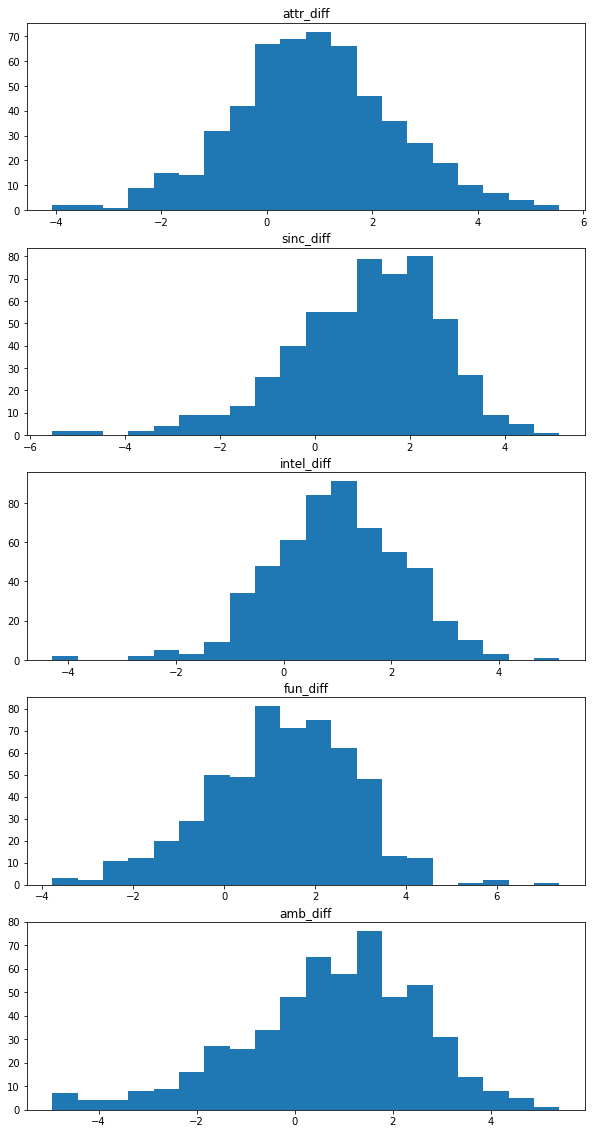

In [42]:
plt.figure(figsize=(10, 20))
labels = ["attr_diff", "sinc_diff", "intel_diff", "fun_diff", "amb_diff"]
for i in range(5):
    plt.subplot(5,1,i+1)
    plt.hist(people[labels[i]].values.astype(np.float64), bins=20)
    plt.title(labels[i])
plt.show()

In [49]:
people[labels].values.astype(np.float64).mean(axis=0)

array([0.89806022, 1.06741549, 0.98790808, 1.26951799, 0.75705166])